In [2]:
from Interval import *
import cv2
import json

ModuleNotFoundError: No module named 'Interval'

In [1]:
with open('obstacles.json') as f:   
    data = json.load(f)
obstacles = []
for obstacle in data['obstacles']:
    params,center = obstacle['params'],obstacle['center']
    obstacles.append(Interval(*params,center))

NameError: name 'json' is not defined

In [23]:
class Robot(Interval):
    radius = 30
    bot_color = 'b'
    color = 'blue'
    Δt = 1
    obstacles = None
    
    def __init__(self,x_bot,y_bot,yaw,vi,vj,wi,wj):
        
        self.x_bot = x_bot
        self.y_bot = y_bot
        self.yaw = yaw
        self.vi = vi
        self.vj = vj
        self.wi = wi
        self.wj = wj
        self.theta1 = yaw
        self.theta2 = yaw + (wi - wj)*self.Δt
        self.origin = (x_bot+self.radius*(np.cos(self.theta1)+np.cos(self.theta2))/(1e-6 + np.sin(self.theta1-self.theta2)),
                       y_bot+self.radius*(np.sin(self.theta1)+np.sin(self.theta2))/(1e-6 + np.sin(self.theta1-self.theta2)))
        self.r1 = 0
        self.r2 = (vi-vj)*self.Δt
        n = self.radius/np.sin(1e-6+(self.theta2-self.theta1)/2)
        self.nu1 = n - self.radius
        self.nu2 = n + self.radius + self.r2
        super(Robot,self).__init__(self.nu1,self.nu2,self.theta1,self.theta2,self.origin)
    
    def collision_detection(self):
        Js = []
        for obstacle in self.obstacles:
            #### maybe multiprocessing here
            J = self.interval_analysis(obstacle)
            Js.append(J)
            pass
            return J
            
        
    
    def __iter__(self):
        return self
    
    def __next__(self):
        pose = [self.x_bot,self.y_bot,self.yaw]
        x_bot_new = self.x_bot + (self.vi-self.vj)*np.cos(self.yaw)*self.Δt
        y_bot_new = self.y_bot + (self.vi-self.vj)*np.sin(self.yaw)*self.Δt
        yaw_new = self.yaw + (self.wi-self.wj)*self.Δt
        collision,J = collision_detection(self)
        if not collision:
            self.x_bot = x_bot_new
            self.y_bot = y_bot_new
            self.yaw = yaw_new
            
        else:
            pass
            #cook something that creates new v,w which do not crash into the obstacles 
        
        return Robot(*pose,self.vi,self.vj,self.wi,self.wj)
            
        
        
    def plot(self,ax):
        bot_circle = plt.Circle( (self.x_bot, self.y_bot),self.radius,color=self.bot_color)
        arrow = ax.arrow(self.x_bot,self.y_bot,self.radius*np.cos(self.yaw),self.radius*np.sin(self.yaw))
        patch = ax.add_patch(bot_circle)
        return [bot_circle,arrow]
                           
    def plot_interval(self,ax):
        return super(Robot,self).draw(ax,self.color)
    
    @classmethod
    def set_environment(cls,obstacles):
        cls.obstacles = obstacles

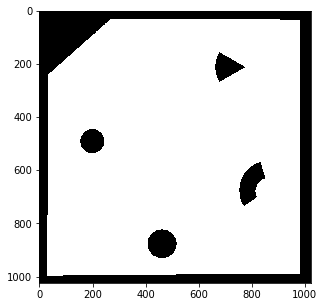

In [7]:
arena = cv2.imread("arena1.png")
arena = (1-cv2.cvtColor(arena,cv2.COLOR_RGB2GRAY)/255).astype('int')
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.gray_r)

KeyboardInterrupt: 

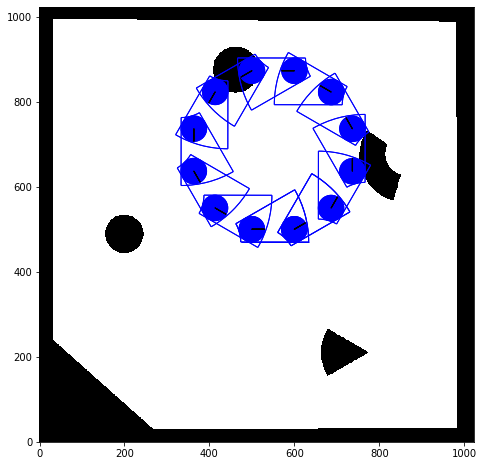

In [25]:
robot = Robot(500,500,0,100,0,0.5235,0)
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
i = 0
for pose in robot:
    i+=1
    pose.plot(ax)
    pose.plot_interval(ax)
    del pose
    if i == 10:
        continue

true


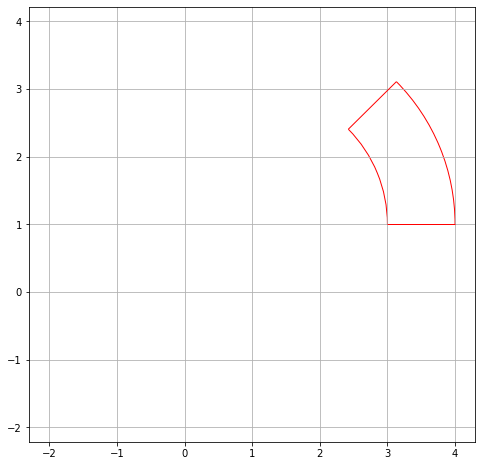

In [5]:
fig,ax = plt.subplots(figsize=(8,8))
I1 = Interval(2,3,0,0.78,(1,1))
if Point(3.99,1.1) in I1:
    print("true")
else:
    print('bleh')
I1.draw(ax,'red')
plt.axis('equal')
plt.grid()
plt.show()

In [5]:
p = Point(2,3.5)
#np.array(p)
p[0]

2